In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join(os.path.dirname(os.path.abspath('.')), 'data')
train_dir = os.path.join(data_dir, 'training-cat-or-dogs')
validation_dir = os.path.join(data_dir, 'validation-cat-or-dogs')

train_dir_dogs = os.path.join(train_dir, 'dogs')
train_dir_cats = os.path.join(train_dir, 'cats')

validation_dir_dogs = os.path.join(validation_dir, 'dogs')
validation_dir_cats = os.path.join(validation_dir, 'cats')

print(train_dir_dogs)
print(train_dir_cats)

print(validation_dir_dogs)
print(validation_dir_cats)

print('Total training cat images: ', len(os.listdir(train_dir_cats)))
print('Total training dog images: ', len(os.listdir(train_dir_dogs)))

print('Total validation cat images: ', len(os.listdir(validation_dir_cats)))
print('Total validation dog images: ', len(os.listdir(validation_dir_dogs)))

D:\CProgrammingLanguage\tf-specialization\course2\data\training-cat-or-dogs\dogs
D:\CProgrammingLanguage\tf-specialization\course2\data\training-cat-or-dogs\cats
D:\CProgrammingLanguage\tf-specialization\course2\data\validation-cat-or-dogs\dogs
D:\CProgrammingLanguage\tf-specialization\course2\data\validation-cat-or-dogs\cats
Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


In [3]:
# Building the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    x = train_generator, 
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 39s - loss: 0.8818 - accuracy: 0.5125 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/15
100/100 - 33s - loss: 0.6964 - accuracy: 0.5500 - val_loss: 0.6689 - val_accuracy: 0.6450
Epoch 3/15
100/100 - 32s - loss: 0.6841 - accuracy: 0.6595 - val_loss: 0.6077 - val_accuracy: 0.6710
Epoch 4/15
100/100 - 32s - loss: 0.6195 - accuracy: 0.6735 - val_loss: 0.5900 - val_accuracy: 0.7110
Epoch 5/15
100/100 - 32s - loss: 0.5682 - accuracy: 0.7135 - val_loss: 0.6343 - val_accuracy: 0.6650
Epoch 6/15
100/100 - 32s - loss: 0.5206 - accuracy: 0.7400 - val_loss: 0.5912 - val_accuracy: 0.7010
Epoch 7/15
100/100 - 31s - loss: 0.5125 - accuracy: 0.7865 - val_loss: 0.5677 - val_accuracy: 0.7220
Epoch 8/15
100/100 - 35s - loss: 0.4163 - accuracy: 0.8195 - val_loss: 0.6594 - val_accuracy: 0.7200
Epoch 9/15
100/100 - 34s - loss: 0.3818 - accuracy: 0.8345 - val_

<Figure size 432x288 with 0 Axes>

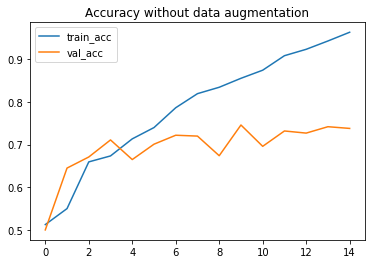

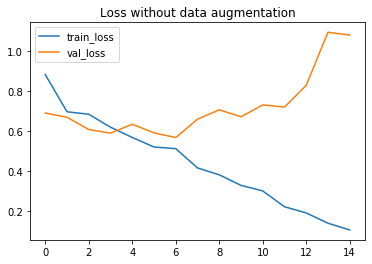

<Figure size 432x288 with 0 Axes>

In [12]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epoches = np.arange(15)

plt.plot(epoches, acc, label='train_acc')
plt.plot(epoches, val_acc, label='val_acc')
plt.title('Accuracy without data augmentation')
plt.legend()
plt.figure()

plt.plot(epoches, loss, label='train_loss')
plt.plot(epoches, val_loss, label='val_loss')
plt.title('Loss without data augmentation')
plt.legend()
plt.figure()

New model with data augmentation

In [13]:
# Building the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    x = train_generator, 
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 41s - loss: 0.8011 - accuracy: 0.5020 - val_loss: 0.6902 - val_accuracy: 0.5020
Epoch 2/15
100/100 - 38s - loss: 0.7232 - accuracy: 0.5205 - val_loss: 0.7243 - val_accuracy: 0.5000
Epoch 3/15
100/100 - 38s - loss: 0.6820 - accuracy: 0.5760 - val_loss: 0.6585 - val_accuracy: 0.5710
Epoch 4/15
100/100 - 38s - loss: 0.6654 - accuracy: 0.6270 - val_loss: 0.6471 - val_accuracy: 0.6480
Epoch 5/15
100/100 - 41s - loss: 0.6509 - accuracy: 0.6370 - val_loss: 0.6096 - val_accuracy: 0.6810
Epoch 6/15
100/100 - 42s - loss: 0.6473 - accuracy: 0.6445 - val_loss: 0.6100 - val_accuracy: 0.6640
Epoch 7/15
100/100 - 40s - loss: 0.6422 - accuracy: 0.6465 - val_loss: 0.6002 - val_accuracy: 0.6740
Epoch 8/15
100/100 - 39s - loss: 0.6455 - accuracy: 0.6645 - val_loss: 0.5698 - val_accuracy: 0.7030
Epoch 9/15
100/100 - 39s - loss: 0.6220 - accuracy: 0.6730 - val_

<Figure size 432x288 with 0 Axes>

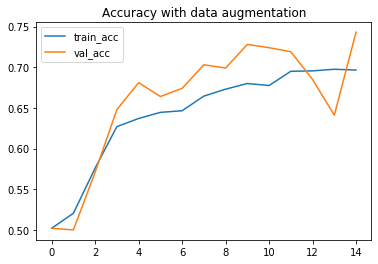

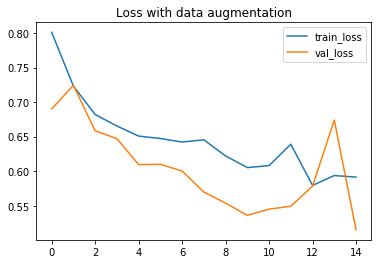

<Figure size 432x288 with 0 Axes>

In [15]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epoches = np.arange(15)

plt.plot(epoches, acc, label='train_acc')
plt.plot(epoches, val_acc, label='val_acc')
plt.title('Accuracy with data augmentation')
plt.legend()
plt.figure()

plt.plot(epoches, loss, label='train_loss')
plt.plot(epoches, val_loss, label='val_loss')
plt.title('Loss with data augmentation')
plt.legend()
plt.figure()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

<Figure size 432x288 with 0 Axes>

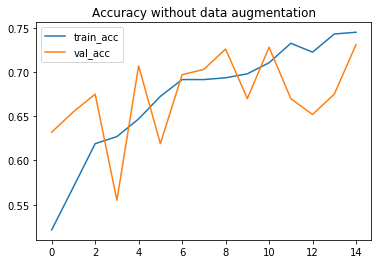

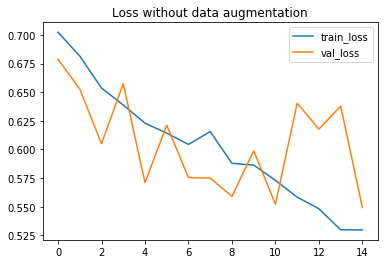

<Figure size 432x288 with 0 Axes>

In [16]:
# Building the model with GlobalAverage

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    x = train_generator, 
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epoches = np.arange(15)

plt.plot(epoches, acc, label='train_acc')
plt.plot(epoches, val_acc, label='val_acc')
plt.title('Accuracy without data augmentation')
plt.legend()
plt.figure()

plt.plot(epoches, loss, label='train_loss')
plt.plot(epoches, val_loss, label='val_loss')
plt.title('Loss without data augmentation')
plt.legend()
plt.figure()